# BreastInsight: AI Image Classifier
## Breast Ultrasound Image Classification using CNN

## Read Data

### Import Libraries

In [114]:
import tensorflow as tf
import pandas as pd 
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt 
import os 
import pathlib 
import random

### Define Paths

In [115]:
path = 'Dataset_BUSI_with_GT'
data_dir = pathlib.Path(path)

### Define Class Names

In [116]:
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names

array(['benign', 'malignant', 'normal'], dtype='<U9')

### Define Image Paths

In [117]:
benignPath = os.path.join(data_dir,'benign')
malignantPath = os.path.join(data_dir,'malignant')
normalPath = os.path.join(data_dir,'normal')

### Image Count

In [118]:
imageCount = len(list(data_dir.glob('*/*.png')))
imageCount

1578

## Explore Data

### Plotting Random Images

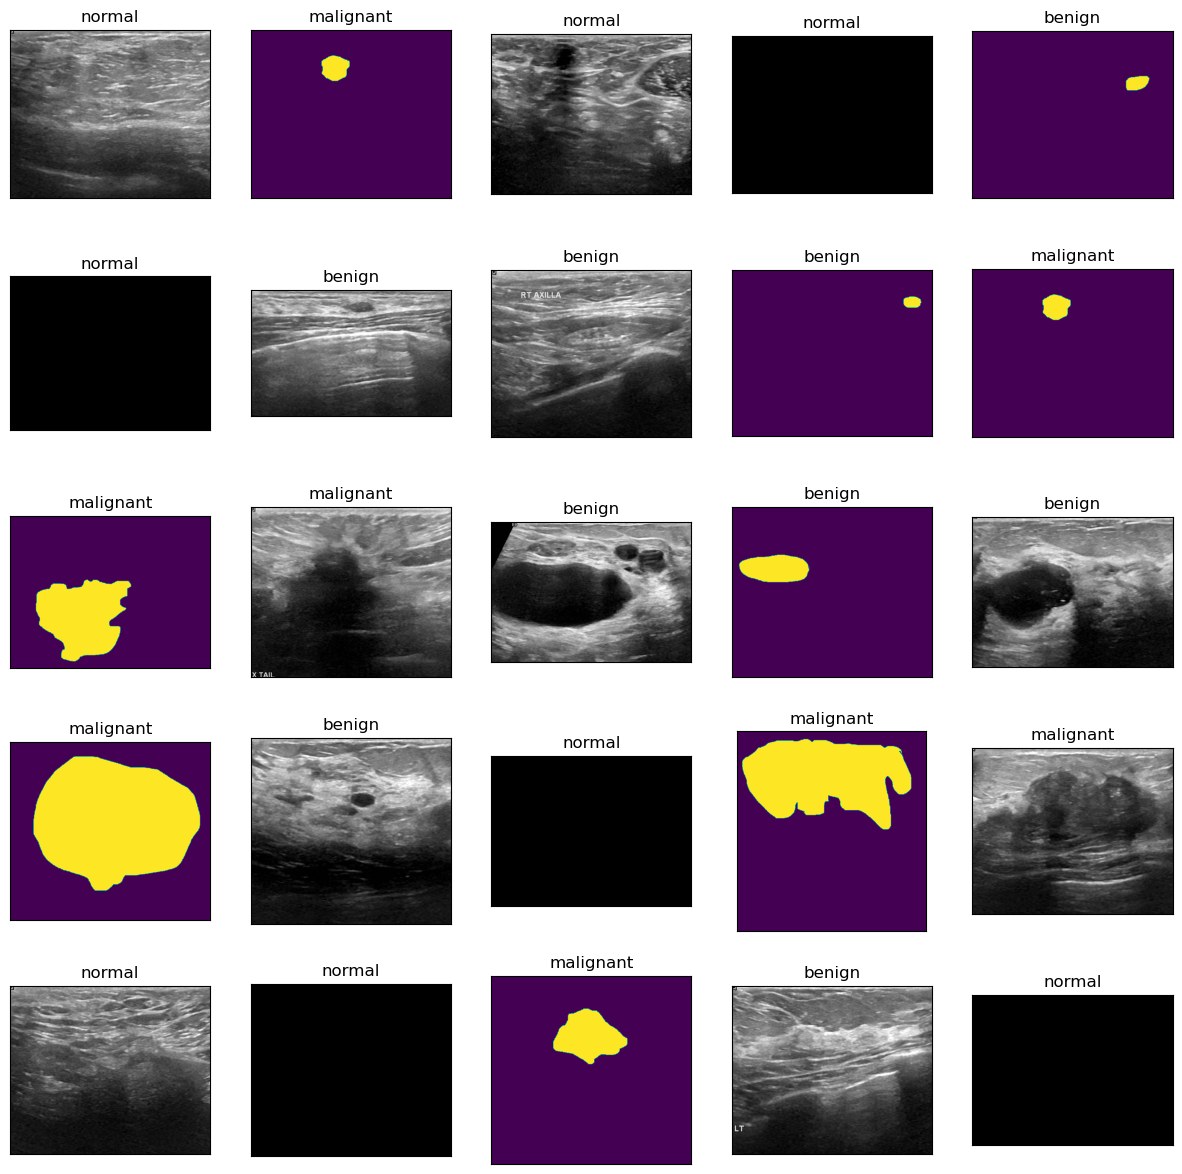

In [119]:
import random
import matplotlib.pyplot as plt
from pathlib import Path

plt.figure(figsize=(15,15))

for i in range(25):
    plt.subplot(5,5,i+1)
    random_class = random.choice(class_names)
    img = plt.imread(random.choice(list(data_dir.glob(random_class+"/*.png"))))
    plt.xticks([])
    plt.yticks([])
    plt.title(random_class)
    plt.imshow(img)

### Filtering Image Formats

In [120]:
from pathlib import Path
import imghdr

data_dir = '../input/breast-ultrasound-images-dataset/Dataset_BUSI_with_GT/'
image_extensions = [".png", ".jpg"]  # add there all your images file extensions

img_type_accepted_by_tf = ["bmp", "gif", "jpeg", "png"]
for filepath in Path(data_dir).rglob("*"):
    if filepath.suffix.lower() in image_extensions:
        img_type = imghdr.what(filepath)
        if img_type is None:
            print(f"{filepath} is not an image")
        elif img_type not in img_type_accepted_by_tf:
            print(f"{filepath} is a {img_type}, not accepted by TensorFlow")

## Convolutional Neural Network

### Define Batch, Height and Width 

In [121]:
batch_size = 32
img_height = 224
img_width = 224

### Making Training and Validation Data

In [122]:
import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory
import pathlib

path = 'Dataset_BUSI_with_GT'
data_dir = pathlib.Path(path)

train_data = image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

val_data = image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 1578 files belonging to 3 classes.


Using 1263 files for training.
Found 1578 files belonging to 3 classes.
Using 315 files for validation.


### Defining Model

In [123]:
from tensorflow.keras import layers 
model = tf.keras.Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
    
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
    
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
    
  layers.Dropout(0.5),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(3,activation="softmax")
])

### Compiling Model

In [124]:
model.compile(optimizer="Adam",
            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
            metrics=["accuracy"])

In [125]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping

# Define the Early Stopping callback
early_stopping_callback = EarlyStopping(
    monitor='val_loss',
    patience=10,  # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Restore weights from the epoch with the best value of the monitored metric
)

epochs = 100

history = model.fit(
    train_data,
    epochs=epochs,
    validation_data=val_data,
    batch_size=batch_size,
    callbacks=[early_stopping_callback]
)

Epoch 1/100


c:\ProgramData\anaconda3\lib\site-packages\keras\backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


40/40 [==============================] - 71s 2s/step - loss: 0.9921 - accuracy: 0.5598 - val_loss: 0.7969 - val_accuracy: 0.6889
Epoch 2/100
40/40 [==============================] - 66s 2s/step - loss: 0.6824 - accuracy: 0.6960 - val_loss: 0.7185 - val_accuracy: 0.6921
Epoch 3/100
40/40 [==============================] - 66s 2s/step - loss: 0.5880 - accuracy: 0.7419 - val_loss: 0.7278 - val_accuracy: 0.6794
Epoch 4/100
40/40 [==============================] - 65s 2s/step - loss: 0.4665 - accuracy: 0.8068 - val_loss: 0.7122 - val_accuracy: 0.7048
Epoch 5/100
40/40 [==============================] - 66s 2s/step - loss: 0.3389 - accuracy: 0.8575 - val_loss: 0.8232 - val_accuracy: 0.7460
Epoch 6/100
40/40 [==============================] - 67s 2s/step - loss: 0.2761 - accuracy: 0.9034 - val_loss: 0.8900 - val_accuracy: 0.7016
Epoch 7/100
40/40 [==============================] - 66s 2s/step - loss: 0.1966 - accuracy: 0.9311 - val_loss: 1.0129 - val_accuracy: 0.7714
Epoch 8/100
40/40 [======

### Define Keys

In [126]:
history.history.keys()
history.history['accuracy']

[0.5597783327102661,
 0.6959620118141174,
 0.7418844103813171,
 0.8068091869354248,
 0.8574821949005127,
 0.9034045934677124,
 0.9311164021492004,
 0.9564529061317444,
 0.9691211581230164,
 0.974663496017456,
 0.974663496017456,
 0.9794141054153442,
 0.987331748008728,
 0.9881235361099243]

### Visualize Accuracy vs Lost

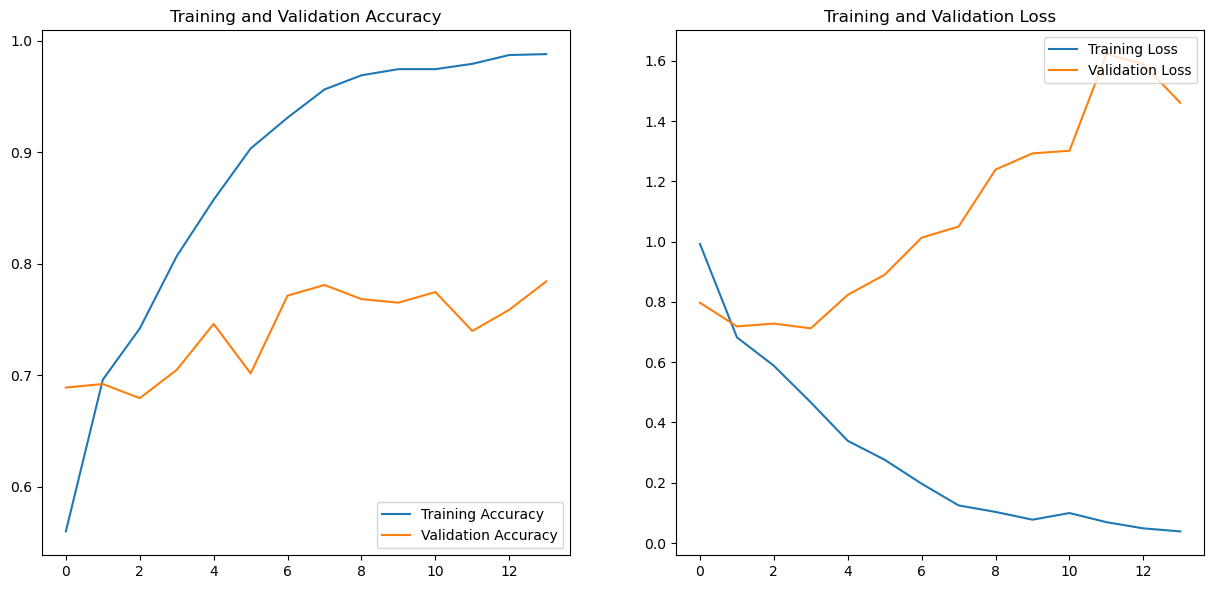

In [127]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')

plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')

plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


### Confusion Matrix

In [128]:
import numpy as np
from sklearn.metrics import classification_report

# Assuming you have the true labels for the validation dataset
true_labels = np.concatenate([y for x, y in val_data], axis=0)

# Assuming you have already trained and compiled your model
predictions = model.predict(val_data)

# Convert predicted probabilities to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Generate classification report
report = classification_report(true_labels, predicted_labels, target_names=class_names)

print(report)

10/10 [==============================] - 5s 348ms/step
              precision    recall  f1-score   support

      benign       0.56      0.68      0.62       180
   malignant       0.23      0.16      0.19        80
      normal       0.21      0.15      0.17        55

    accuracy                           0.46       315
   macro avg       0.33      0.33      0.33       315
weighted avg       0.41      0.46      0.43       315



10/10 [==============================] - 5s 377ms/step


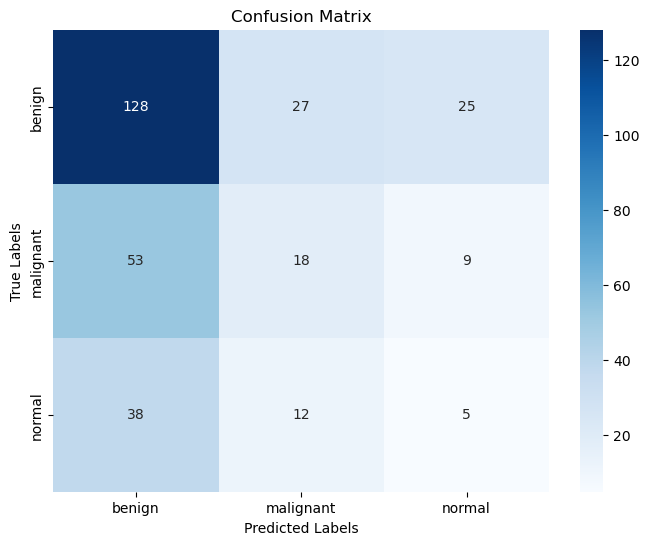

In [155]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have the true labels for the validation dataset
true_labels = np.concatenate([y for x, y in val_data], axis=0)

# Assuming you have already trained and compiled your model
predictions = model.predict(val_data)

# Convert predicted probabilities to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Generate classification report
report = classification_report(true_labels, predicted_labels, target_names=class_names)

# Create confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Create a heatmap for visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

### Evaluation

In [129]:
model.evaluate(val_data)

10/10 [==============================] - 5s 356ms/step - loss: 0.7122 - accuracy: 0.7048


[0.7121773362159729, 0.7047619223594666]

### Model Summary

In [130]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 112, 112, 16)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 56, 56, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 56, 56, 64)       

## Predictions

1/1 [==============================] - 0s 40ms/step


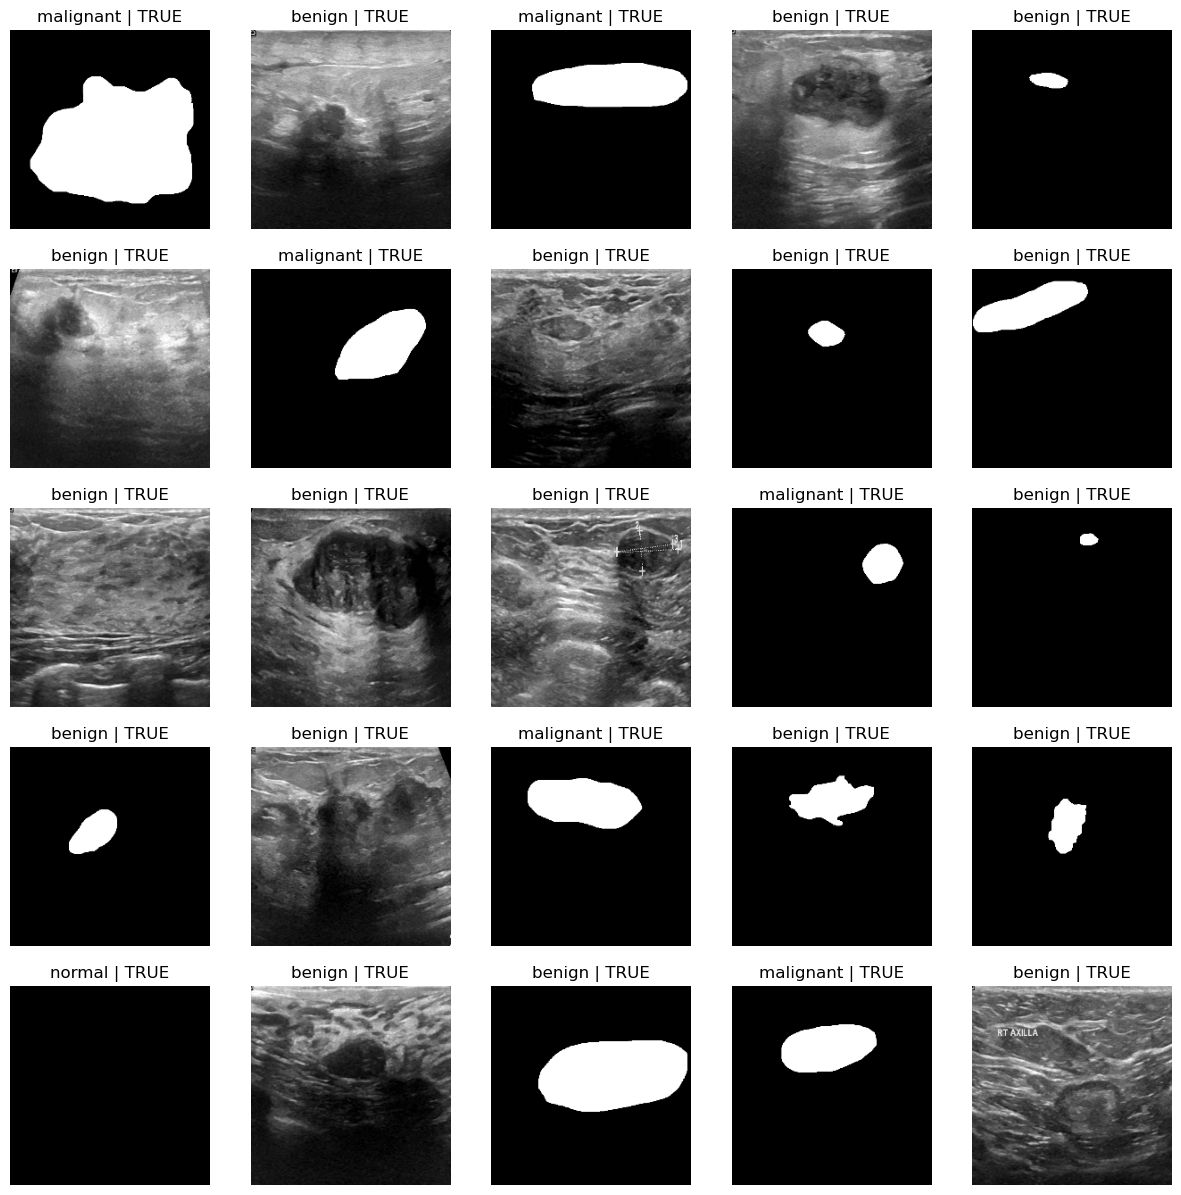

In [131]:
plt.figure(figsize=(15, 15))
class_names = val_data.class_names
result = ' | False'
for images, labels in val_data.take(1):
    for i in range(25):
        
        ax = plt.subplot(5, 5, i + 1)
        img = images[i].numpy().astype("uint8")
        img = tf.expand_dims(img, axis=0)
        
        predictions = model.predict(img)
        predicted_class = np.argmax(predictions)
        if class_names[predicted_class] == class_names[labels[i]]:
            result = ' | TRUE'
            
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[predicted_class]+result  )
        plt.axis("off")

In [132]:
model.save('uas.h5')

## Load Model

In [140]:
from tensorflow.keras.models import load_model
# Load the h5 model
model = load_model('uas.h5')

# Define a dictionary or a list to map numeric labels to string labels
label_mapping = {0: 'benign', 1: 'malignant', 2: 'normal'}

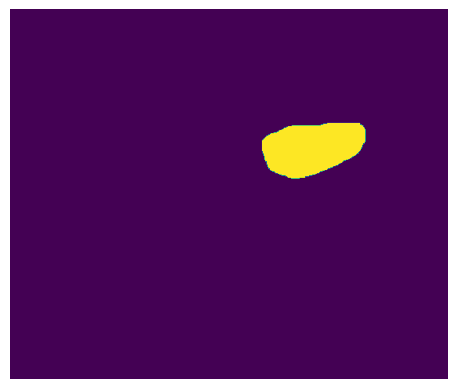

In [153]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image

image_path_to_predict = "Dataset_BUSI_with_GT\\benign\\benign (3)_mask.png"

# Load the image using mpimg
image = mpimg.imread(image_path_to_predict)

# Display the image using plt.imshow()
plt.imshow(image)
plt.axis('off')  # Optional: Turn off axis labels
plt.show()

In [154]:
import numpy as np
from PIL import Image

# Resize the image
resized_image = Image.fromarray(image).resize((224, 224))

# Convert the resized image to a numpy array
resized_image_array = np.array(resized_image)

# Expand dimensions to represent batch size
preprocessed_image = np.expand_dims(resized_image_array, axis=-1)  # Add an additional dimension for grayscale

rgb_image = np.stack((resized_image_array,) * 3, axis=-1)

# Expand dimensions to repre\sent batch size
preprocessed_image = np.expand_dims(rgb_image, axis=0)

# Get the predicted class
predicted_class = np.argmax(predictions, axis=1)

# Map the numeric labels to string labels
predicted_labels_string = [label_mapping[label] for label in predicted_class]

# Print the predicted class
print("Predictions Array:", predictions)
print("Predicted class:", predicted_class)
print("Predicted Label:", predicted_labels_string)


Predictions Array: [[0.7112912  0.13872631 0.14998245]]
Predicted class: [0]
Predicted Label: ['benign']
